## Consigna 1er Parcial Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. Agosto 2024.

# Ejercicio: Simulación de Dinámica Molecular en 2D

En este ejercicio, simularemos un sistema de partículas en dos dimensiones utilizando el método de Monte Carlo y por qué no Euler también. Nuestro objetivo es observar la distribución de posiciones y velocidades de las partículas en una caja y calcular sus propiedades energéticas. 

## Objetivo

1. **Generar un conjunto de partículas en una caja 2D**: Inicialmente, las partículas tienen posiciones y velocidades aleatorias.
2. **Simular el comportamiento de las partículas en equilibrio térmico**: Actualizar las posiciones y velocidades de las partículas durante la simulación.
3. **Calcular propiedades energéticas**: Determinar la energía cinética y potencial del sistema.
4. **Visualizar los resultados**: Mostrar la distribución de posiciones y velocidades de las partículas.

## Descripción del Sistema

1. **Posiciones**: Las partículas están distribuidas aleatoriamente dentro de una caja bidimensional.
2. **Velocidades**: Las velocidades de las partículas siguen una distribución normal y están escaladas por la temperatura del sistema para simular equilibrio térmico.

## Pasos del Ejercicio

1. **Inicialización**:
   - En el contexto de simulaciones de dinámica molecular y física computacional, la temperatura se usa a menudo en términos de $kT$, donde
$k$ es la constante de Boltzmann $1.38e23 \frac{J}{K}$ y $T$ es la temperatura en kelvins.<br>
Para simplificar los calculos, usaremos kt = 1.0, Para simulaciones más precisas y completas, especialmente en aplicaciones reales, es necesario considerar las constantes físicas adecuadas y las unidades
   - Generar $n$ partículas con posiciones aleatorias en un rango de [-1, 1] en ambas direcciones (x, y), es decir, create dos vectores  de $n$ partículas con las coordenadas aleatoreas x e y.
   - Asignar a cada partícula una velocidad inicial aleatoria, multiplicada por la raíz cuadrada de la temperatura, es decir, nuevamente dos vectores con las velocidades en x e y para n partículas

2. **Simulación**:
   - Para cada paso de simulación:
     - Actualizar las posiciones del vector de partículas en función de sus velocidades actuales.
     - Asumir que no hay fuerzas externas actuando sobre las partículas (modelo simplificado).
     - No es necesario actualizar las velocidades de las partículas ( ya que en este modelo, las velocidades permanecen sin cambios porque las fuerzas son cero, aunque podés dejarlo escrito).

3. **Cálculo de Energías**:
   - **Energía Cinética**: Calculada como $( K = \frac{1}{2} m v^2 )$, donde $( v )$ es la velocidad de cada partícula.
   - **Energía Potencial**: Calculada como $( U = \frac{1}{2} k x^2 )$, donde $( x )$ es la posición de cada partícula en la caja.

4. **Visualización**:
   - Graficar las posiciones finales de las partículas en la caja. No es necesario grafiques el paso a paso.
   - Mostrar la distribución de las componentes de velocidad en los ejes x e y.

Energía cinética: K = 340.5267
Energía potencial: U = 3405893.8102
Energía total: E = 3406234.3369


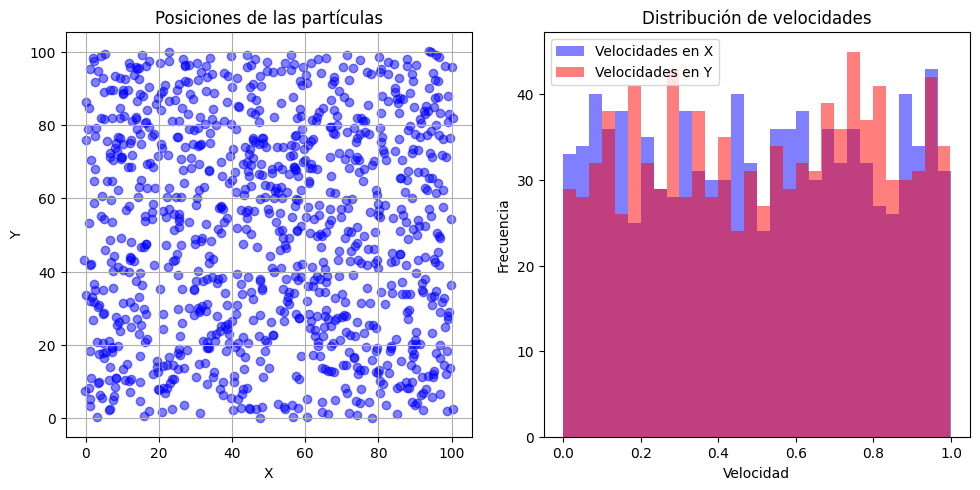

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
n = 1000  # Número de partículas
num_pasos = 10000     # Número de pasos de simulación
temperatura = 1.0     # Temperatura en términos de kT

# Inicialización
posiciones_x = np.random.random(n)  * 2 - 1# Posiciones X aleatorias
posiciones_y = np.random.random(n)  * 2 -1# Posiciones Y aleatorias
velocidades_x = np.random.random(n) * np.sqrt(temperatura)  # Velocidades X aleatorias
velocidades_y = np.random.random(n) * np.sqrt(temperatura)  # Velocidades Y aleatorias

# Parámetros de la simulación
dt = 0.01  # Paso de tiempo

# Simulación de dinámica molecular
for i in range(num_pasos):
    # Actualización de posiciones
    posiciones_x += velocidades_x * dt
    posiciones_y += velocidades_y * dt
    
    # En este modelo simplificado, no hay fuerzas externas
    fuerzas_x = np.zeros(n)
    fuerzas_y = np.zeros(n)
    
    # Actualización de velocidades
    velocidades_x += fuerzas_x * dt
    velocidades_y += fuerzas_y * dt

# Calcular la energía cinética y potencial
energia_cinetica = 0.5 * (np.sum(velocidades_x**2) + np.sum(velocidades_y**2))
energia_potencial = 0.5 * (np.sum(posiciones_x**2) + np.sum(posiciones_y**2))
energia_total = energia_cinetica + energia_potencial

print(f"Energía cinética: K = {energia_cinetica:.4f}")
print(f"Energía potencial: U = {energia_potencial:.4f}")
print(f"Energía total: E = {energia_total:.4f}")

# Visualización de las posiciones de las partículas
plt.figure(figsize=(10, 5))

# Posiciones
plt.subplot(1, 2, 1)
plt.scatter(posiciones_x, posiciones_y, alpha=0.5, color='blue')
plt.title("Posiciones de las partículas")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Distribución de velocidades
plt.subplot(1, 2, 2)
plt.hist(velocidades_x, bins=30, alpha=0.5, color='blue', label='Velocidades en X')
plt.hist(velocidades_y, bins=30, alpha=0.5, color='red', label='Velocidades en Y')
plt.title("Distribución de velocidades")
plt.xlabel("Velocidad")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()